# Data Cleaning using Central Tendency (Mean, Median) by class

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset from Google Drive
datafromdrive = 'https://drive.google.com/file/d/1_Tj6f1AXtKJ5Dj7SJvxGGIN6lKExaom1/view?usp=sharing'
datafromdrive = 'https://drive.google.com/uc?id=' + datafromdrive.split('/')[-2]
data = pd.read_csv(datafromdrive)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Shape of Data
data.shape

(1460, 81)

In [4]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Data Descriptive statistics
data.describe()

In [5]:
# Checking null values in the column
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

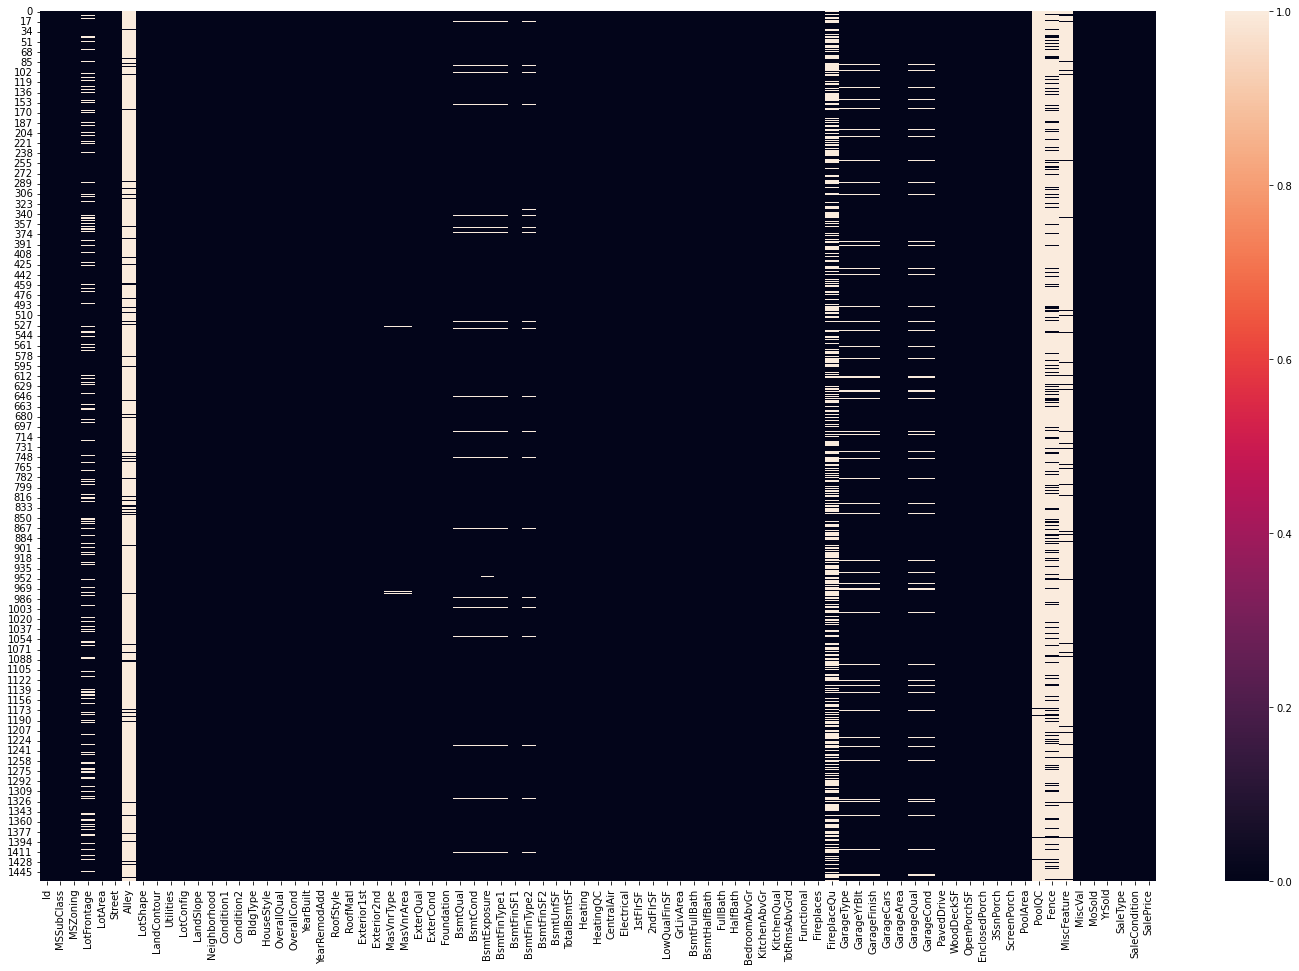

In [6]:
# Plotting heatmap of null values
plt.figure(figsize=(25, 16))
sns.heatmap(data.isnull())
plt.show()

In [7]:
# Checking percentage of null values in each column
null_var = data.isnull().sum() / data.shape[0] * 100
null_var

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [8]:
# Columns having null values more than 20%
null_columns = null_var[null_var > 20].keys()
null_columns

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [9]:
# Dropping columns having null values more than 20%
droped_columns = data.drop(columns=null_columns)
droped_columns.shape

(1460, 76)

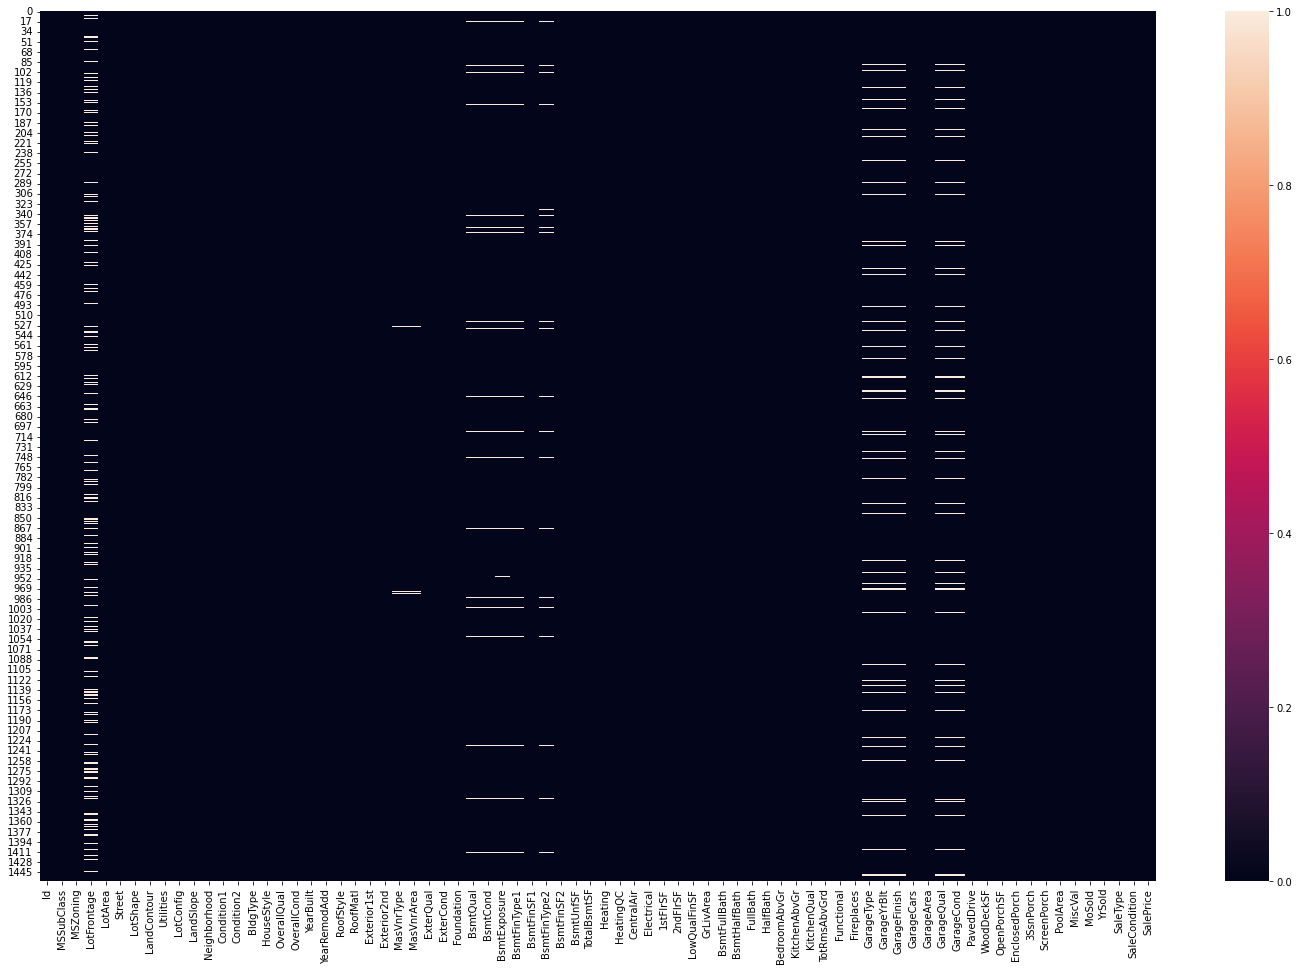

In [10]:
# Plotting heatmap of new dataset
plt.figure(figsize=(25, 16))
sns.heatmap(droped_columns.isnull())
plt.show()

In [11]:
# Getting numerical data from the dataset
num_data = droped_columns.select_dtypes(include=['int', 'float'])
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
# Checking null values in the numerical data
num_data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [13]:
# Getting columns having null values
missing_variables = [var for var in num_data.columns if num_data[var].isnull().sum()>0]
missing_variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [14]:
num_data[missing_variables][num_data[missing_variables].isnull().any(axis=1)]

,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0
12,NaN,0.0,1962.0
14,NaN,212.0,1960.0
16,NaN,180.0,1970.0
24,NaN,0.0,1968.0
...,...,...,...
1443,NaN,0.0,1916.0
1446,NaN,189.0,1962.0
1449,21.0,0.0,NaN
1450,60.0,0.0,NaN


In [15]:
# getting unique values from the 'LetConfig' Variable
data['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [16]:
# Getting all the rows having values 'Inside' in 'LetConfig' variable
data[data.loc[:,'LotConfig']=='Inside']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [17]:
# Getting all the rows of column 'LotFrontage' having values 'Inside' in 'LetConfig' variable
data[data.loc[:,'LotConfig']=='Inside']['LotFrontage']

0       65.0
2       68.0
5       85.0
6       75.0
8       51.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1052, dtype: float64

In [18]:
# Replacing the mean values of same class in 'LetFrontage' variable
data[data.loc[:,'LotConfig']=='Inside']['LotFrontage'].replace(np.nan,data[data.loc[:,'LotConfig']=='Inside']['LotFrontage'].mean())

0       65.0
2       68.0
5       85.0
6       75.0
8       51.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1052, dtype: float64

In [19]:
# Replacing all the missing values with the mean of respective classes in 'LetFrontage' variable
data_copy = num_data.copy()
for var_class in data['LotConfig'].unique():
    data_copy.update(data[data.loc[:,'LotConfig']==var_class]['LotFrontage'].replace(np.nan,data[data.loc[:,'LotConfig']==var_class]['LotFrontage'].mean()))

In [20]:
data_copy.isnull().sum()

Id                0
MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [21]:
# Replacing all the missing values with the mean of respective classes in each variable having null values
data_copy = data.copy()
num_variable = ['LotFrontage','MasVnrArea','GarageYrBlt']
cat_variable = ['LotConfig','MasVnrType','GarageType']
for cat_variable, num_variable in zip(cat_variable,num_variable):
    for var_class in data[cat_variable].unique():
        data_copy.update(data[data.loc[:,cat_variable]==var_class][num_variable].replace(np.nan,data[data.loc[:,cat_variable]==var_class][num_variable].mean()))

In [22]:
# Checking for null values
data_copy[missing_variables].isnull().sum()

LotFrontage     0
MasVnrArea      8
GarageYrBlt    81
dtype: int64

Categorical Variable taken should be clean

In [23]:
# Replacing all the missing values with the mean of respective classes in each variable having null values
data_copy_mean = data.copy()
num_variable = ['LotFrontage','MasVnrArea','GarageYrBlt']
cat_variable = ['LotConfig','Exterior2nd','KitchenQual']
for cat_variable, num_variable in zip(cat_variable,num_variable):
    for var_class in data[cat_variable].unique():
        data_copy_mean.update(data[data.loc[:,cat_variable]==var_class][num_variable].replace(np.nan,data[data.loc[:,cat_variable]==var_class][num_variable].mean()))

In [24]:
# Checking for null values
data_copy_mean[missing_variables].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Data Distribution

C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

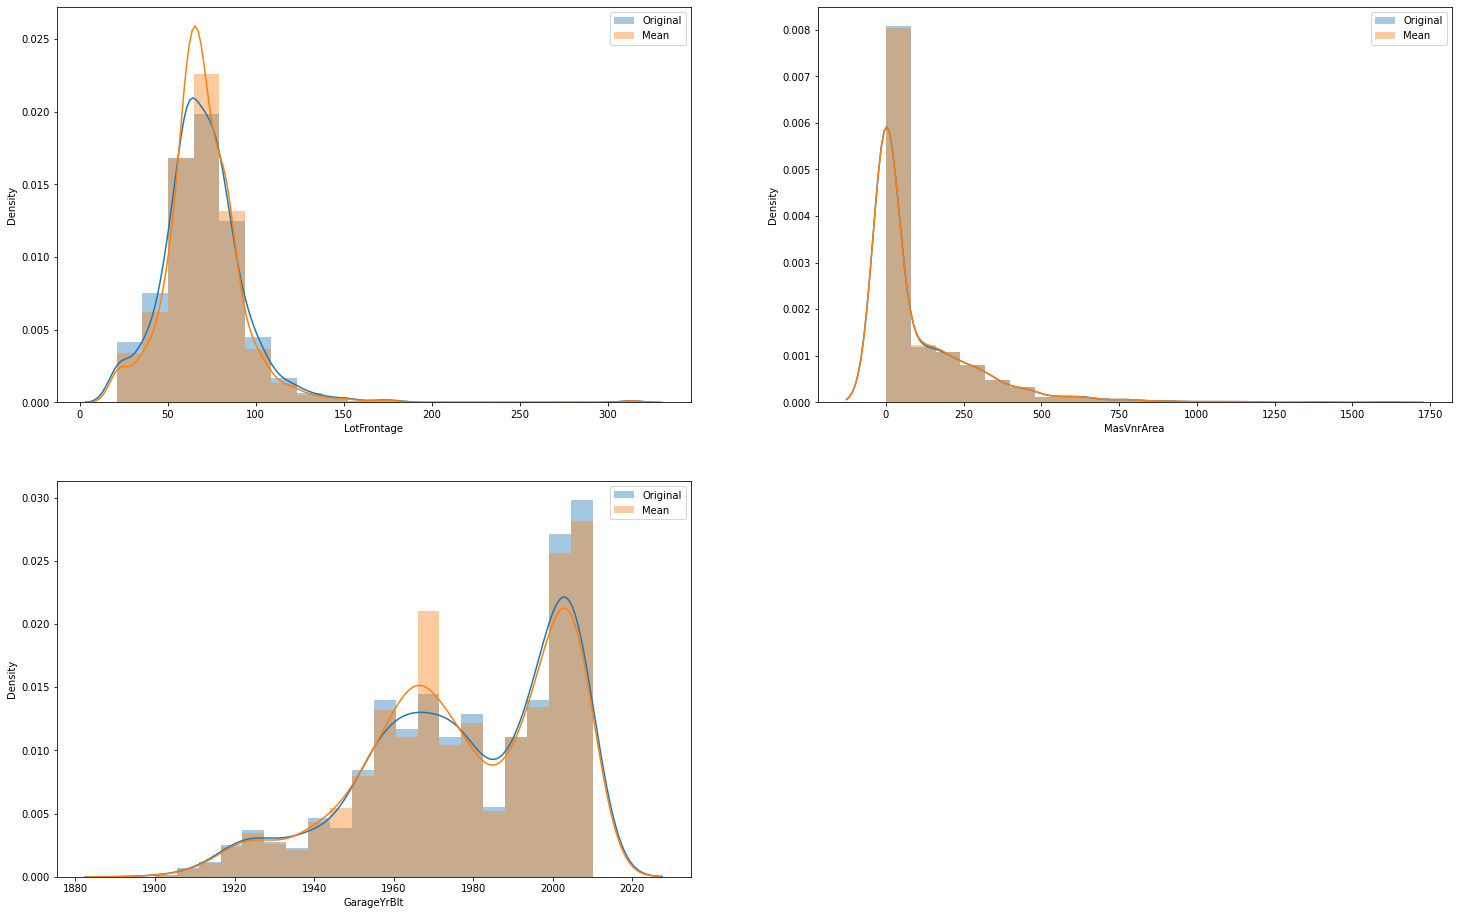

In [25]:
# Data distribution of original and cleaned data
plt.figure(figsize=(25,16))
for i, var in enumerate(missing_variables):
    plt.subplot(2,2, i+1)
    sns.distplot(num_data[var], bins=20,label='Original')
    sns.distplot(data_copy_mean[var], bins=20,label='Mean')
    plt.legend()
plt.show()

In [26]:
# Replacing all the missing values with the median of respective classes in each variable having null values
data_copy_median = data.copy()
num_variable = ['LotFrontage','MasVnrArea','GarageYrBlt']
cat_variable = ['LotConfig','Exterior2nd','KitchenQual']
for cat_variable, num_variable in zip(cat_variable,num_variable):
    for var_class in data[cat_variable].unique():
        data_copy_median.update(data[data.loc[:,cat_variable]==var_class][num_variable].replace(np.nan,data[data.loc[:,cat_variable]==var_class][num_variable].median()))

C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

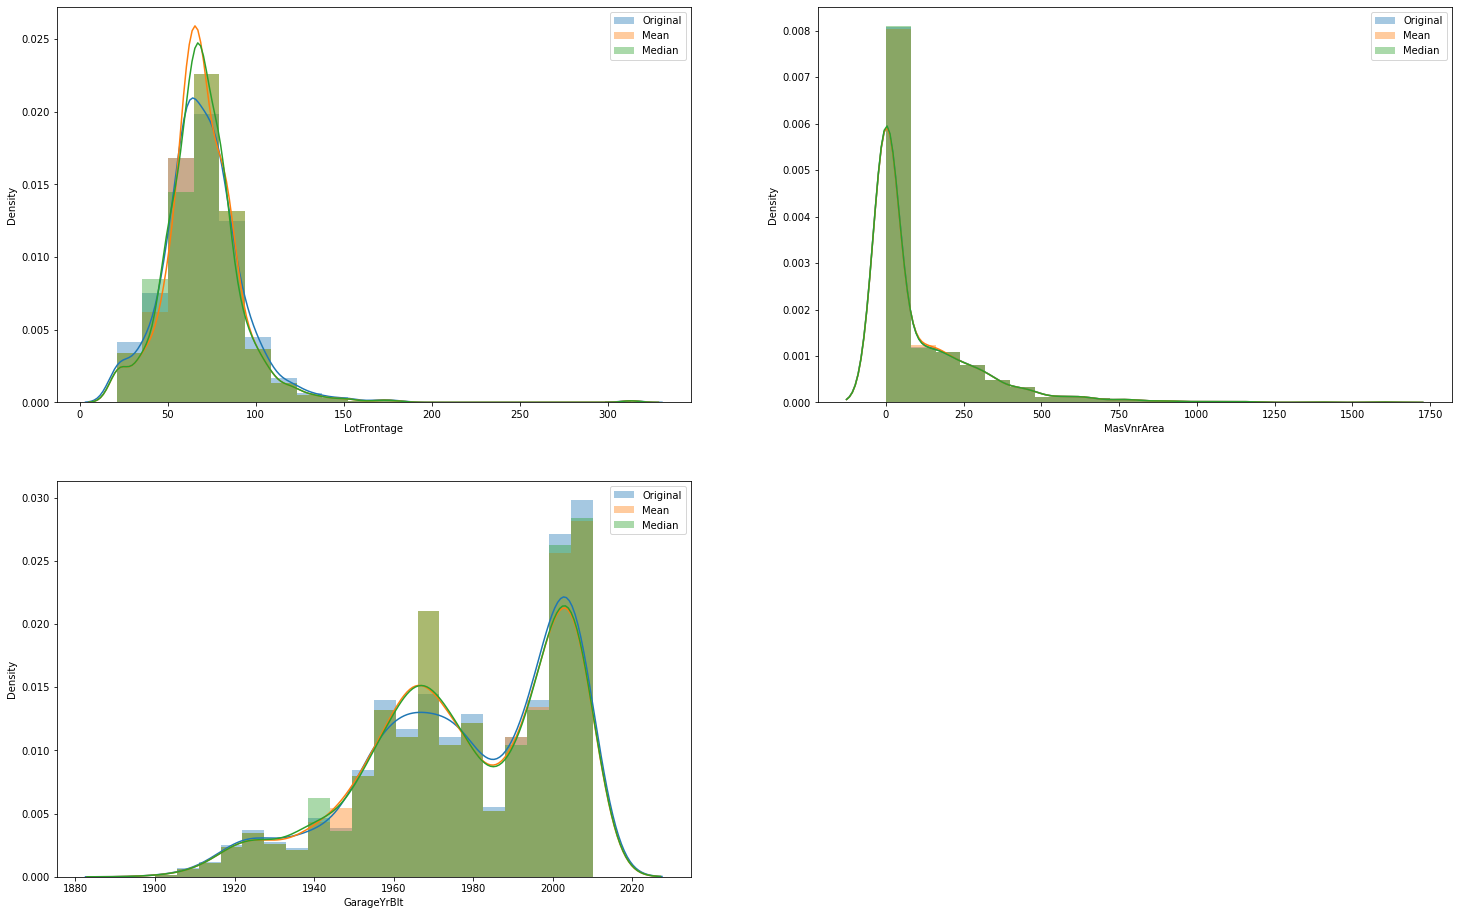

In [27]:
# Data distribution of original and cleaned data
plt.figure(figsize=(25,16))
for i, var in enumerate(missing_variables):
    plt.subplot(2,2, i+1)
    sns.distplot(num_data[var], bins=20,label='Original')
    sns.distplot(data_copy_mean[var], bins=20,label='Mean')
    sns.distplot(data_copy_median[var], bins=20,label='Median')
    plt.legend()
plt.show()

### Prepared by RITURAJ RAMAN